In [2]:
from frequency_processing.pyatsyn import ats_io, ats_structure, ats_synth
from frequency_processing.pyatsyn.atsa import critical_bands, peak_detect, peak_tracking, residual, tracker, tracker_numpy, utils, windows

import numpy as np
import scipy
from IPython.display import Audio
import matplotlib.pyplot as plt


In [3]:
SAMPLE_RATE = 44100
TIME = 1
N = TIME * SAMPLE_RATE
T = 1 / SAMPLE_RATE
def sine(freq: float, amplitude: float, attack = 0, length = TIME):
    t = np.linspace(0, length, length*SAMPLE_RATE)
    wave = amplitude * np.sin(2 * freq * np.pi * t)
    if attack != 0:
        samples_attack = np.floor(SAMPLE_RATE * attack)
        for i in range(int(samples_attack)):
            wave[i] *= (i / samples_attack)
    return wave

def saw(freq: float, amplitude: float, attack = 0, length = TIME):
    t = np.linspace(0, length, length*SAMPLE_RATE)
    wave = amplitude * freq * np.fmod(t, 1 / freq)
    if attack != 0:
        samples_attack = np.floor(SAMPLE_RATE * attack)
        for i in range(int(samples_attack)):
            wave[i] *= (i / samples_attack)
    return wave

def get_audio(arr, rate = SAMPLE_RATE):
    return Audio(arr, rate = rate)

def fft(wave):
    yf = scipy.fft.fft(wave)
    xf = scipy.fft.fftfreq(N, T)[:N//2]
    return yf, xf

def plot_wave_precomputed(wave_fft, orig_len, min_freq, y_lim):
    yf = wave_fft
    xf = scipy.fft.fftfreq(orig_len, T)[:N//2]
    plt.plot(xf, 2.0 / N * np.abs(yf[0:N//2]))
    plt.xlim(min_freq)
    plt.xscale("log")
    if y_lim is not None:
        plt.ylim(0,y_lim)
    plt.show()
    
def plot_wave_fft(wave_fft, min_freq, y_lim):
    (yf, xf) = wave_fft
    plt.plot(xf, 2.0 / N * np.abs(yf[0:N//2]))
    plt.xlim(min_freq)
    plt.xscale("log")
    if y_lim is not None:
        plt.ylim(0,y_lim)
    plt.show()

def get_audio(arr, rate = SAMPLE_RATE):
    return Audio(arr, rate = rate)

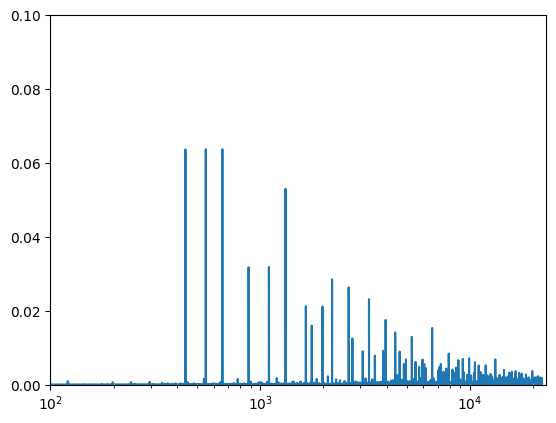

In [4]:
saw_wave = saw(440, 1/5) + saw(550, 1/5) + saw(660, 1/5)
plot_wave_fft(fft(saw_wave), 100, 0.1)
get_audio(saw_wave)

In [8]:
ats_snd = tracker_numpy.tracker_numpy(saw_wave, SAMPLE_RATE)
synthesized = ats_synth.synth(ats_snd)
get_audio(synthesized, SAMPLE_RATE)

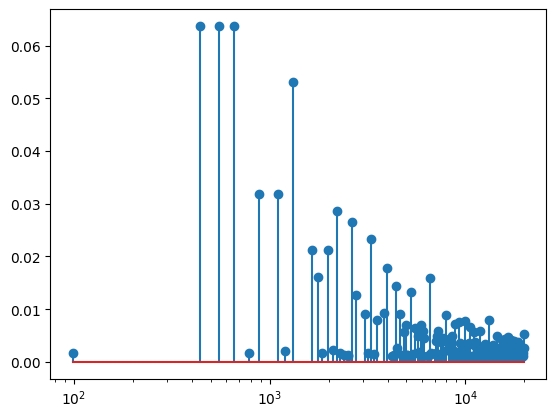

In [16]:
plt.stem(ats_snd.frq_av, ats_snd.amp_av)
plt.xscale("log")
plt.show()